In [1]:
import glob
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL.ImageOps as ImOps

In [2]:
def prepare_dataset(path):
    x_train=[]
    y_train=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img = ImOps.invert(img)
                img=img_to_array(img)
                img=img/255.0
                x_train.append(img)
                y_train.append(label)
    return np.array(x_train),np.array(y_train)

In [3]:
x_train, y_train = prepare_dataset('train/')
x_test, y_test = prepare_dataset('test/')

In [4]:
print("Shape x_train :",x_train.shape)
print("Shape y_train:", y_train.shape)
print(" bShape x_train :",x_test.shape)
print("Shape y_train:", y_test.shape)

Shape x_train : (3780, 64, 64, 3)
Shape y_train: (3780,)
 bShape x_train : (1620, 64, 64, 3)
Shape y_train: (1620,)


In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)

datagen.fit(x_train, augment=True)
data_test = datagen.flow(x_train, y_train, batch_size=5)

Using TensorFlow backend.


Train Augmetasi Data


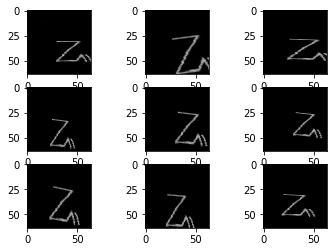

In [6]:
from numpy import expand_dims
import matplotlib.pyplot as plt

img = x_train[1250]
samples = expand_dims(img, 0)
it = datagen.flow(samples, batch_size=1)
print("Train Augmetasi Data")
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

In [7]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam

def modelLeNet():
    model = Sequential()

    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))

    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(120, (5, 5), activation='relu'))

    model.add(Flatten())

    model.add(Dense(84, activation='relu'))

    model.add(Dense(18, activation = 'softmax'))
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelLeNet().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9720)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [8]:
LeNet_Aug = modelLeNet()
LeNet_without_Aug = modelLeNet()

In [9]:
history_Lenet = LeNet_without_Aug.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Train on 3780 samples, validate on 1620 samples
Epoch 1/15
3780/3780 [==============================] - 16s 4ms/step - loss: 2.5422 - acc: 0.2151 - val_loss: 2.0499 - val_acc: 0.3802
Epoch 2/15
3780/3780 [==============================] - 16s 4ms/step - loss: 1.7185 - acc: 0.4667 - val_loss: 1.4747 - val_acc: 0.5364
Epoch 3/15
3780/3780 [==============================] - 19s 5ms/step - loss: 1.2039 - acc: 0.6241 - val_loss: 1.0844 - val_acc: 0.6543
Epoch 4/15
3780/3780 [==============================] - 20s 5ms/step - loss: 0.8218 - acc: 0.7458 - val_loss: 0.8637 - val_acc: 0.7228
Epoch 5/15
3780/3780 [==============================] - 19s 5ms/step - loss: 0.6201 - acc: 0.8042 - val_loss: 0.7695 - val_acc: 0.7667
Epoch 6/15
3780/3780 [==============================] - 18s 5ms/step - loss: 0.4644 - acc: 0.8540 - val_loss: 0.6921 - val_acc: 0.7969
Epoch 7/15
3780/3780 [==============================] - 19s 5ms/step - loss: 0.3625 - acc: 0.8870 - val_loss: 0.5874 - val_acc: 0.8235
Epoch 8

In [10]:
history_Lenet_Aug = LeNet_Aug.fit(data_test,validation_data=(x_test,y_test),
          steps_per_epoch=len(x_train)/5, epochs=15)

Epoch 1/15
756/756 [==============================] - 37s 49ms/step - loss: 2.6269 - acc: 0.1767 - val_loss: 1.7850 - val_acc: 0.4364
Epoch 2/15
756/756 [==============================] - 44s 58ms/step - loss: 1.6659 - acc: 0.4717 - val_loss: 0.8714 - val_acc: 0.7099
Epoch 3/15
756/756 [==============================] - 26s 35ms/step - loss: 1.1007 - acc: 0.6405 - val_loss: 0.5722 - val_acc: 0.8191
Epoch 4/15
756/756 [==============================] - 29s 38ms/step - loss: 0.8297 - acc: 0.7481 - val_loss: 0.3983 - val_acc: 0.8907
Epoch 5/15
756/756 [==============================] - 30s 39ms/step - loss: 0.6652 - acc: 0.7839 - val_loss: 0.3660 - val_acc: 0.8870
Epoch 6/15
756/756 [==============================] - 29s 38ms/step - loss: 0.5565 - acc: 0.8228 - val_loss: 0.2548 - val_acc: 0.9241
Epoch 7/15
756/756 [==============================] - 26s 35ms/step - loss: 0.4756 - acc: 0.8503 - val_loss: 0.2004 - val_acc: 0.9364
Epoch 8/15
756/756 [==============================] - 26s 35ms

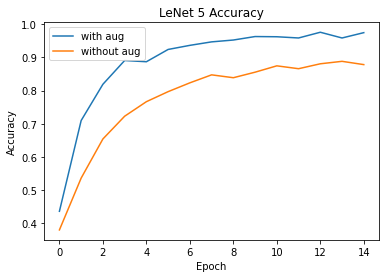

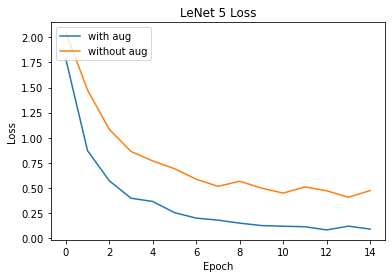

In [11]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Lenet_Aug.history['val_acc'])
plt.plot(history_Lenet.history['val_acc'])
plt.title('LeNet 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

plt.plot(history_Lenet_Aug.history['val_loss'])
plt.plot(history_Lenet.history['val_loss'])
plt.title('LeNet 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

# Prediksi menggunakan data lain

In [15]:
def pred_dataset(path):
    x_pred=[]
    y_pred=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img = ImOps.invert(img)
                img=img_to_array(img)
                img=img/255.0
                x_pred.append(img)
                y_pred.append(label)
    return np.array(x_pred),np.array(y_pred)

def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
    classl = labels[class_code]
    
    return classl

In [16]:
x_pred, y_pred = pred_dataset('pred/')
print("Shape x_pred :",x_pred.shape)
print("Shape y_pred:", y_pred.shape)

Shape x_pred : (293, 64, 64, 3)
Shape y_pred: (293,)


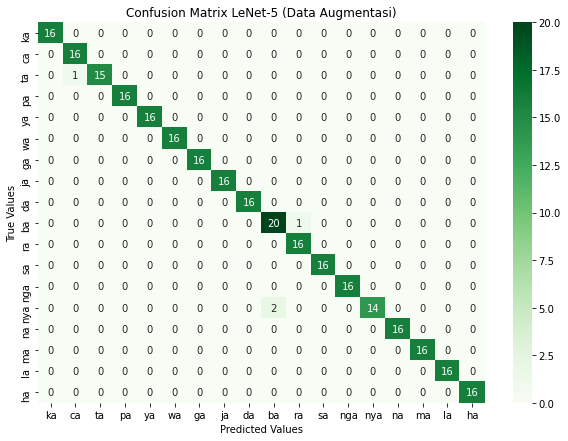

Akurasi yang didapat 0.986 %


In [17]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

label = np.array([ 'ka','ca',  'ta',  'pa',  'ya',  'wa',  'ga',  'ja', 'da',
                  'ba',  'ra', 'sa', 'nga', 'nya', 'na', 'ma', 'la', 'ha'])

LnetAug_pred = LeNet_Aug.predict(x_pred)
LnetAug_pred = np.argmax(LnetAug_pred, 1) 

mat = confusion_matrix(y_pred,LnetAug_pred)
df_cm = pd.DataFrame(mat, label,label)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Greens")
plt.title('Confusion Matrix LeNet-5 (Data Augmentasi)')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

from sklearn.metrics import accuracy_score
print("Akurasi yang didapat {:.3f} %".format(accuracy_score(y_pred, LnetAug_pred)))

## Menyimpan weight untuk inmplementasi pada aplikasi Web

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(LeNet_Aug, 'models')